# **PROJECT NAME - PaisaBazaar Banking Fraud Analysis**


**Project Type** - Exploratory Data Analysis(EDA) + Classification Model

**Contribution** - Individual


# **PROJECT  SUMMARY**

This project is about analyzing and predicting customer credit scores for Paisabazaar, a financial services company. Credit scores are critical in deciding whether a customer can get a loan or credit card, and if they can, under what conditions. The goal here is to understand the patterns in customer financial behavior and use them to build a model that classifies customers as having a Good, Standard, or Poor credit score.

**KEY STEPS :**

1. **Understanding the Data** – exploring what each column means, the types of variables, and how the target (Credit Score) is distributed.

2. **Data Cleaning** – handling missing values, checking for duplicates, fixing inconsistent formats, and preparing the data for analysis.

1. **Exploratory Data Analysis (EDA)** – visualizing distributions, relationships, and correlations to uncover meaningful patterns.


**INSIGHTS**

*   Customers with higher credit utilization ratios (spending close to their credit limit) often had lower credit scores.

* Frequent delays in payments strongly correlated with poor credit scores.

*  Customers with multiple loans or credit cards were at a higher risk of being in the Standard or Poor category.


The project not only shows how machine learning can automate credit score classification but also highlights the financial habits that have the biggest impact on a customer’s credit health.


# **GitHub Link**

dkjsbk


# **Problem Statement**

To analyze and classify credit scores of customers based on historical financial data and build a predictive model that :


*  Helps Paisabazaar improve credit assessment.
*  Reduces loan default risk.
*  Supports better financial recommendations to customers.



# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Dataset Loading

In [3]:
df = pd.read_csv('dataset-2.csv')

# Dataset First View

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


# Dataset Rows & Columns count

In [5]:
print("Columns:\n", df.columns.tolist())

Columns:
 ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


# Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

# Duplicate Values

In [7]:
duplicate_rows = df[df.duplicated()]

# Display duplicate rows if they exist
print("Number of duplicate rows:", duplicate_rows.shape[0])
duplicate_rows.head()

Number of duplicate rows: 0


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


There is no such duplicates values in dataset

# Missing Values / Null Values

Missing Values per column:
 ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


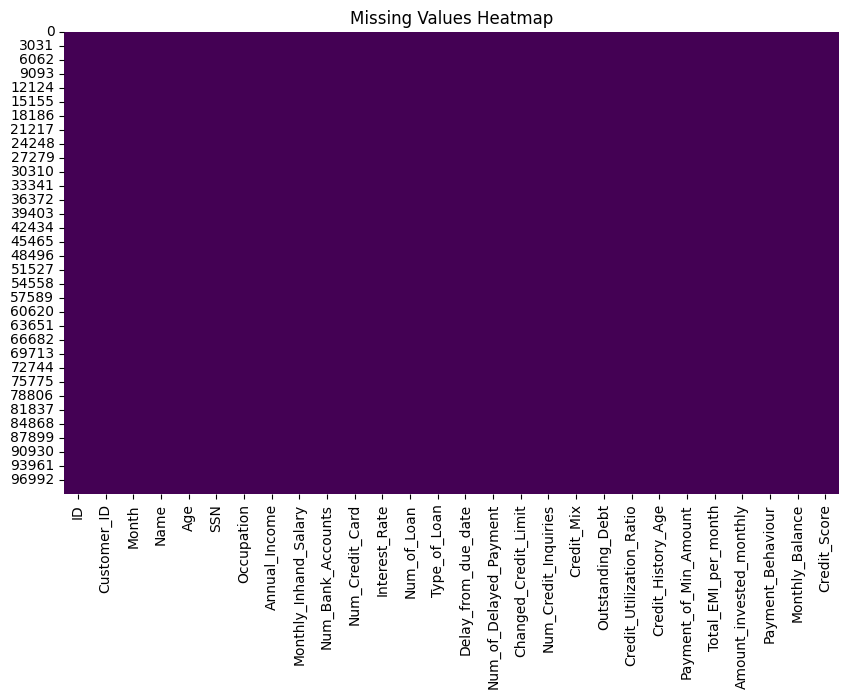

In [8]:
print("Missing Values per column:\n", df.isnull().sum())

# Visualizing the missing values

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
print("Shape of dataset:", df.shape)

Shape of dataset: (100000, 28)


# Dataset Description
This dataset contains one lakh customer records with 28 columns.
It is basically a financial and credit dataset.

It includes customer details such as ID, name, age, occupation, and SSN.
It also provides financial information like annual income, monthly salary, number of bank accounts, number of credit cards, and details of loans etc.

Finally, the most important column is the Credit Score, which classifies customers as Good, Standard, or Poor.

### **Columns Overview**

*  Customer details → ID, Name, Age, Occupation, SSN

*  Financial info → Annual Income, Monthly Salary, Bank Accounts, Credit Cards, Loans

*  Credit behavior → Interest Rate, Delayed Payments, Credit Limit changes, Credit Mix

*  Spending & investments → EMI per month, Investments, Monthly Balance

*  Target column → Credit_Score (Good / Standard / Poor)




In [10]:
df.describe(include="all").transpose()
for col in df.columns:
    print(f"{col} --> {df[col].nunique()} unique values")

ID --> 100000 unique values
Customer_ID --> 12500 unique values
Month --> 8 unique values
Name --> 10128 unique values
Age --> 43 unique values
SSN --> 12500 unique values
Occupation --> 15 unique values
Annual_Income --> 12488 unique values
Monthly_Inhand_Salary --> 13241 unique values
Num_Bank_Accounts --> 12 unique values
Num_Credit_Card --> 12 unique values
Interest_Rate --> 34 unique values
Num_of_Loan --> 10 unique values
Type_of_Loan --> 6261 unique values
Delay_from_due_date --> 63 unique values
Num_of_Delayed_Payment --> 26 unique values
Changed_Credit_Limit --> 3452 unique values
Num_Credit_Inquiries --> 18 unique values
Credit_Mix --> 3 unique values
Outstanding_Debt --> 12203 unique values
Credit_Utilization_Ratio --> 100000 unique values
Credit_History_Age --> 404 unique values
Payment_of_Min_Amount --> 3 unique values
Total_EMI_per_month --> 11890 unique values
Amount_invested_monthly --> 12261 unique values
Payment_Behaviour --> 6 unique values
Monthly_Balance --> 98494 

# Data Wrangling

In [11]:
# Fill missing numeric with median

for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after cleaning:\n", df.isnull().sum().sum())


Missing values after cleaning:
 0


# Data Visualization
Data Visualization is the process of representing data graphically so that patterns, trends, and insights can be easily understood. It transforms raw data into visual forms like charts, graphs, and maps.

## Experimenting with Charts
Trying out different types of charts/graphs on the same dataset to see which one explains the data best.

In [12]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


# Univariate Analysis

## Chart - 1

### **Countplot : Credit Score Distribution**

This countplot shows the frequency distribution of credit scores among the customers in the dataset.


In [13]:
print("Credit Score Counts:")
print(df["Credit_Score"].value_counts())
print("\n")

Credit Score Counts:
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64




/tmp/ipython-input-2171180505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score", data=df, order=df["Credit_Score"].value_counts().index, palette = "Set2")


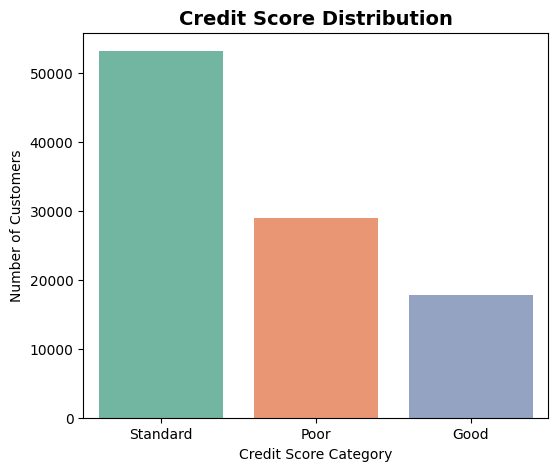

In [17]:
# Distribution of target variable (Credit_Score)
plt.figure(figsize=(6,5))
sns.countplot(x="Credit_Score", data=df, order=df["Credit_Score"].value_counts().index, palette = "Set2")
plt.title("Credit Score Distribution", fontsize=14, weight="bold")
plt.xlabel("Credit Score Category")
plt.ylabel("Number of Customers")
plt.show()

### **Insights :**



*   Standard credit score category has the highest number of customers, showing that most individuals fall into that group.
*   The Poor category has noticeably fewer members compared to others, which could create a class imbalance problem if we build predictive models.



##Chart - 2

### **Histogram : Age Distribution**

This histogram shows the distribution of customer ages in the dataset.

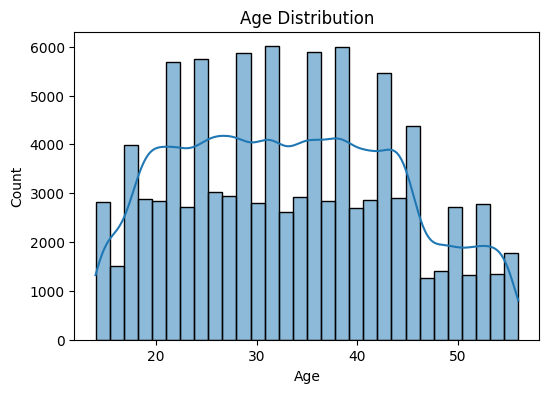

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

### Insights :



*   The distribution is likely centered around middle-aged groups (e.g., 25–45 years), suggesting that most customers are working professionals.

*   Younger age groups (e.g., <20) and older age groups (e.g., >60) appear less frequent, showing that the dataset is dominated by economically active individuals.



##Chart - 3

###**(a) Box Plot: Annual Income vs Credit Score**

Boxplot of annual income grouped by credit score categories.

/tmp/ipython-input-1383037755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Annual_Income", data=df, palette="Set2")


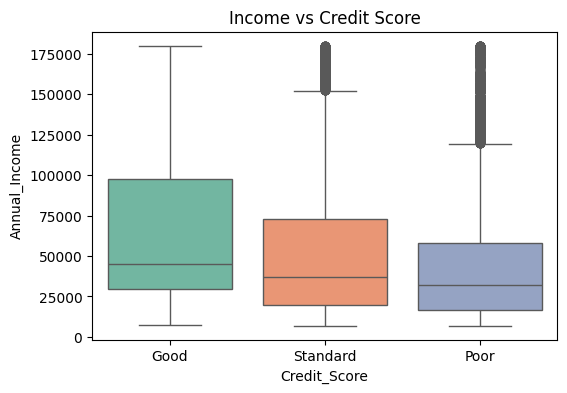

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Credit_Score", y="Annual_Income", data=df, palette="Set2")
plt.title("Income vs Credit Score")
plt.show()


**Insights:**


*   Customers with Good scores usually have higher annual incomes.
*   Outliers suggest some low-income people still manage good scores, and some high-income individuals fall into Poor.



### **(b) Box Plot : Outstanding Debt vs Credit Score**

This plot generates a boxplot that compares Outstanding Debt across different Credit Score categories (Poor, Standard, Good).


/tmp/ipython-input-847853004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


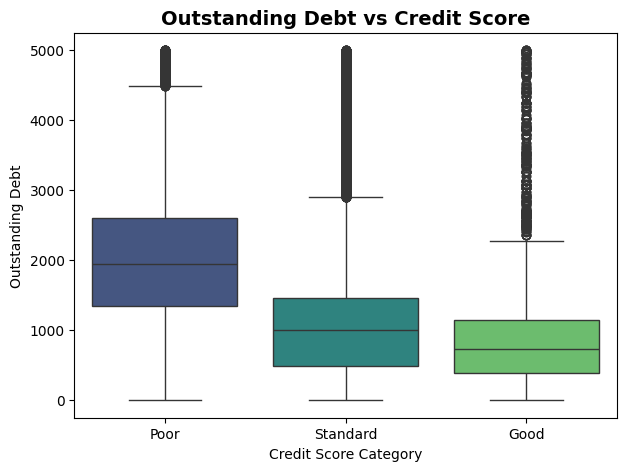

In [20]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x="Credit_Score",y="Outstanding_Debt",data=df,order=["Poor","Standard","Good"],palette="viridis")
plt.title("Outstanding Debt vs Credit Score", fontsize=14, weight="bold")
plt.xlabel("Credit Score Category")
plt.ylabel("Outstanding Debt")
plt.show()

### **Insights :**

*  Poor Credit Score customers → Tend to have higher outstanding debt, with large variation .

*  Standard Credit Score customers → Fall in the middle range, with moderate outstanding debt.

*  Good Credit Score customers → Show lower outstanding debt, with less spread

## Chart - 4
###**Bar Plot: Occupation vs Credit Score**

This plot shows the distribution of different credit score categories (Good, Poor, Standard) across various occupations.



In [21]:
print("Occupation Counts:")
print(df["Occupation"].value_counts())
print("\n")


Occupation Counts:
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64




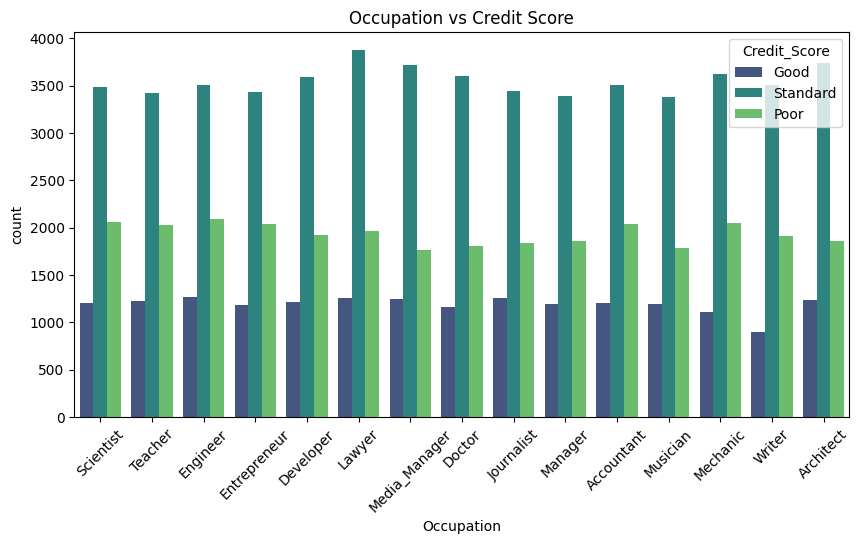

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="Occupation", hue="Credit_Score", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Occupation vs Credit Score")
plt.show()

### **Insights:**

*   Occupation type is an important feature to consider in predicting credit score.
*   Self-employed people are more likely to have Standard or Poor credit scores compared to salaried ones.



##Chart - 5

###**Bar Plot: Payment Behaviour vs Credit Score**

This horizontal bar chart compares payment behavior patterns with credit scores.

In [23]:
print("Payment Behaviour Counts:")
print(df["Payment_Behaviour"].value_counts())
print("\n")

Payment Behaviour Counts:
Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64




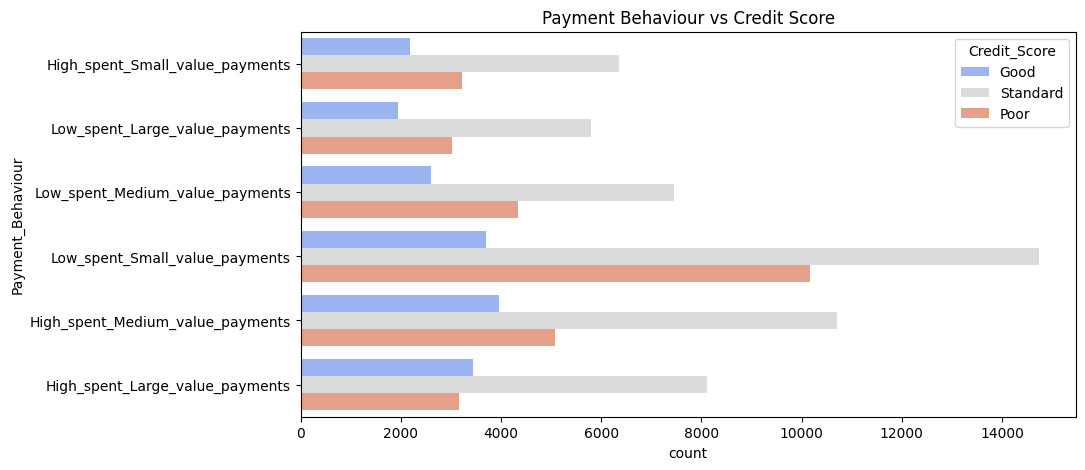

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(y="Payment_Behaviour", hue="Credit_Score", data=df, palette="coolwarm")
plt.title("Payment Behaviour vs Credit Score")
plt.show()

### **Insights:**


*   Customers who “pay after due date” are more associated with Poor credit scores.
*   Regular on-time payers are more likely to have Good credit scores.

*   Payment behavior is strongly correlated with credit score.








##Chart - 6

###**Barplot : Average Monthly Balance by Occupation.**

This bar plot shows the average monthly balance of customers grouped by different occupations.

/tmp/ipython-input-837358624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Occupation", y="Monthly_Balance", data=df, palette="Set3")


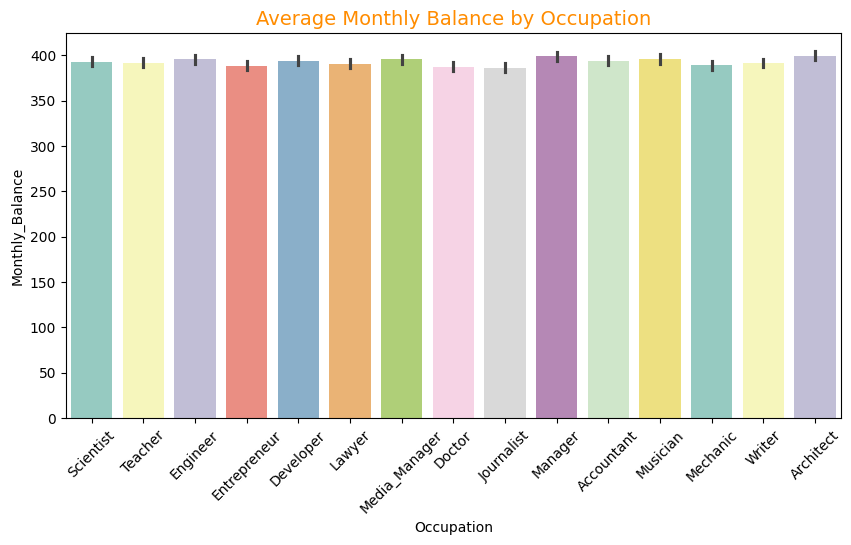

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x="Occupation", y="Monthly_Balance", data=df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Average Monthly Balance by Occupation", fontsize=14, color="darkorange")
plt.show()

### **Insights :**


*   Business and self-employed individuals may show more variation, with lower or moderate balances on average, possibly due to inconsistent income.
*   This pattern indicates that occupation plays a strong role in determining saving capacity, and financial institutions can use this insight to assess repayment ability.



##Chart - 7

###**Histogram: Monthly Balance Distribution**

Distribution of monthly balance values in the dataset.

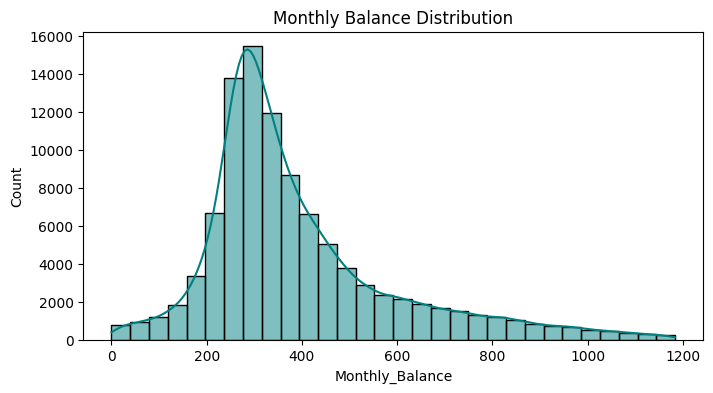

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(df["Monthly_Balance"], bins=30, kde=True, color="teal")
plt.title("Monthly Balance Distribution")
plt.show()

**Insights:**


*   Most customers have balances clustered around a certain range (likely low balances).
*  The right tail suggests a few individuals keep very high balances.



## Chart - 8

###**Boxplot : Age vs Credit Score**
This boxplot compares the age distribution of customers across different credit score categories (Good, Standard, Poor).

/tmp/ipython-input-3605715258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Age", data=df, palette="husl")


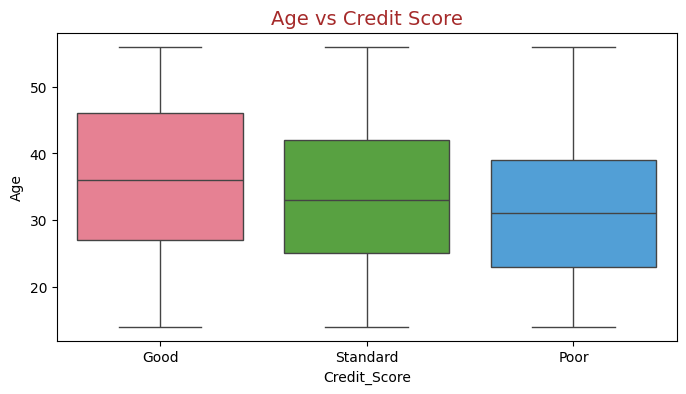

In [27]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Credit_Score", y="Age", data=df, palette="husl")
plt.title("Age vs Credit Score", fontsize=14, color="brown")
plt.show()

###**Insights :**


*   Customers with Good credit scores generally have a higher median age than those with Standard or Poor.

*   The Poor category shows a lower median age, meaning younger individuals are more likely to fall into poor credit categories.



## Chart - 9

### **Violin plot : Annual Income vs Credit Score**

This violin plot shows the distribution of Annual Income across Credit Score categories (Good, Standard, Poor).


/tmp/ipython-input-3528806459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Credit_Score", y="Annual_Income", data=df, palette="viridis", inner="quartile")


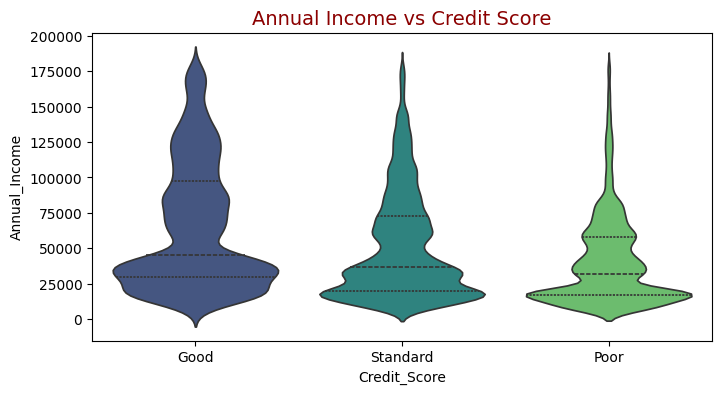

In [28]:
plt.figure(figsize=(8,4))
sns.violinplot(x="Credit_Score", y="Annual_Income", data=df, palette="viridis", inner="quartile")
plt.title("Annual Income vs Credit Score", fontsize=14, color="darkred")
plt.show()

###**Insights :**


*   Standard credit score category has a wider distribution, suggesting it includes both low-income and high-income individuals.

*   Good score category shows a narrower concentration at higher income levels.

*   Higher income generally increases chances of having a Good score, making it an important factor.


## Chart - 10

###**Line Plot: Age vs Annual Income**

Line chart showing trend of annual income across ages, separated by credit score.

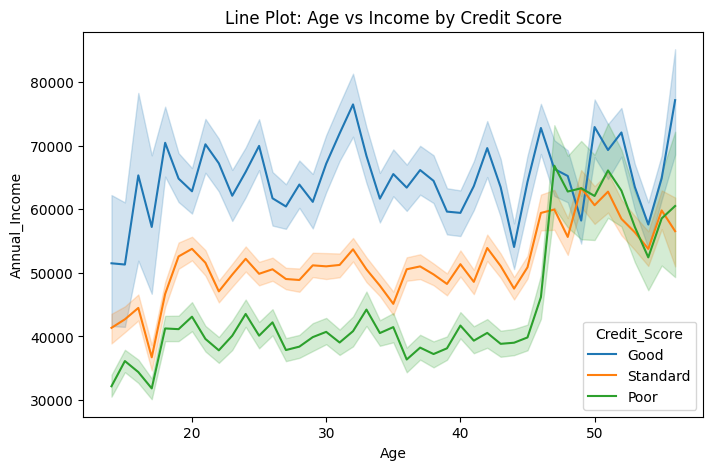

In [29]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Age", y="Annual_Income", hue="Credit_Score", data=df, palette="tab10")
plt.title("Line Plot: Age vs Income by Credit Score")
plt.show()


### **Insights:**


*   Younger individuals generally earn less regardless of score.

*   As age increases, income increases, but high-income individuals are more likely to have Good scores.


*   Some older people still fall in Poor despite higher incomes, likely due to debt.




## Chart - 11

###**Scatter Plot: Annual Income vs Outstanding Debt**

Scatterplot showing relationship between income and debt, colored by credit score

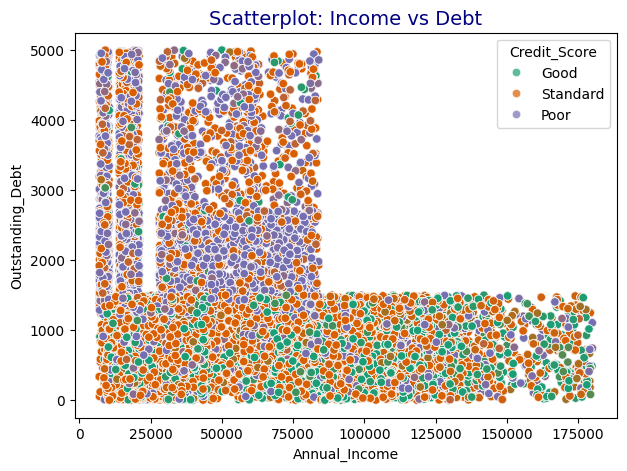

In [30]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Annual_Income", y="Outstanding_Debt", hue="Credit_Score", data=df, palette="Dark2", alpha = 0.7)
plt.title("Scatterplot: Income vs Debt" ,  fontsize=14, color="navy")
plt.show()


### **Insights:**


*   Many Poor credit score customers are clustered at high debt & low income.
*   Higher-income individuals are spread across all scores, showing debt-to-income ratio matters.


*   Clear clusters visible for classification.






##Chart - 12

### **Pie chart :  Credit Score distribution.**


This pie chart provides a snapshot of customer creditworthiness , this helps financial institutions adjust lending strategies and risk policies accordingly.

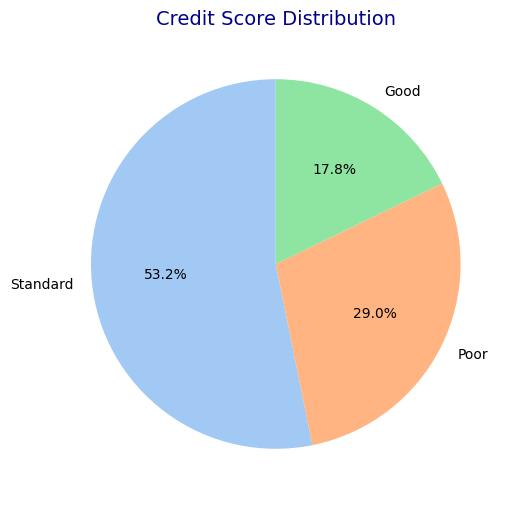

In [31]:
plt.figure(figsize=(6,6))
colors = sns.color_palette("pastel")  # custom pastel colors
df["Credit_Score"].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=90, colors=colors
)
plt.ylabel("")
plt.title("Credit Score Distribution", fontsize=14, color="darkblue")
plt.show()

### **Insights:**


*   The largest slice reveals the most common category among customers.

*   If Standard dominates, it suggests the majority are average scorers who might move up or down with time.

*   A large Poor portion indicates a risk-heavy customer base.

# **Multivariate analysis**

## Chart - 13

### **Pair Plot**

Pairplot showing scatterplots and distributions among numeric features, separated by credit score.

In [32]:
a = df["Credit_Score"].value_counts()
print(a)


Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


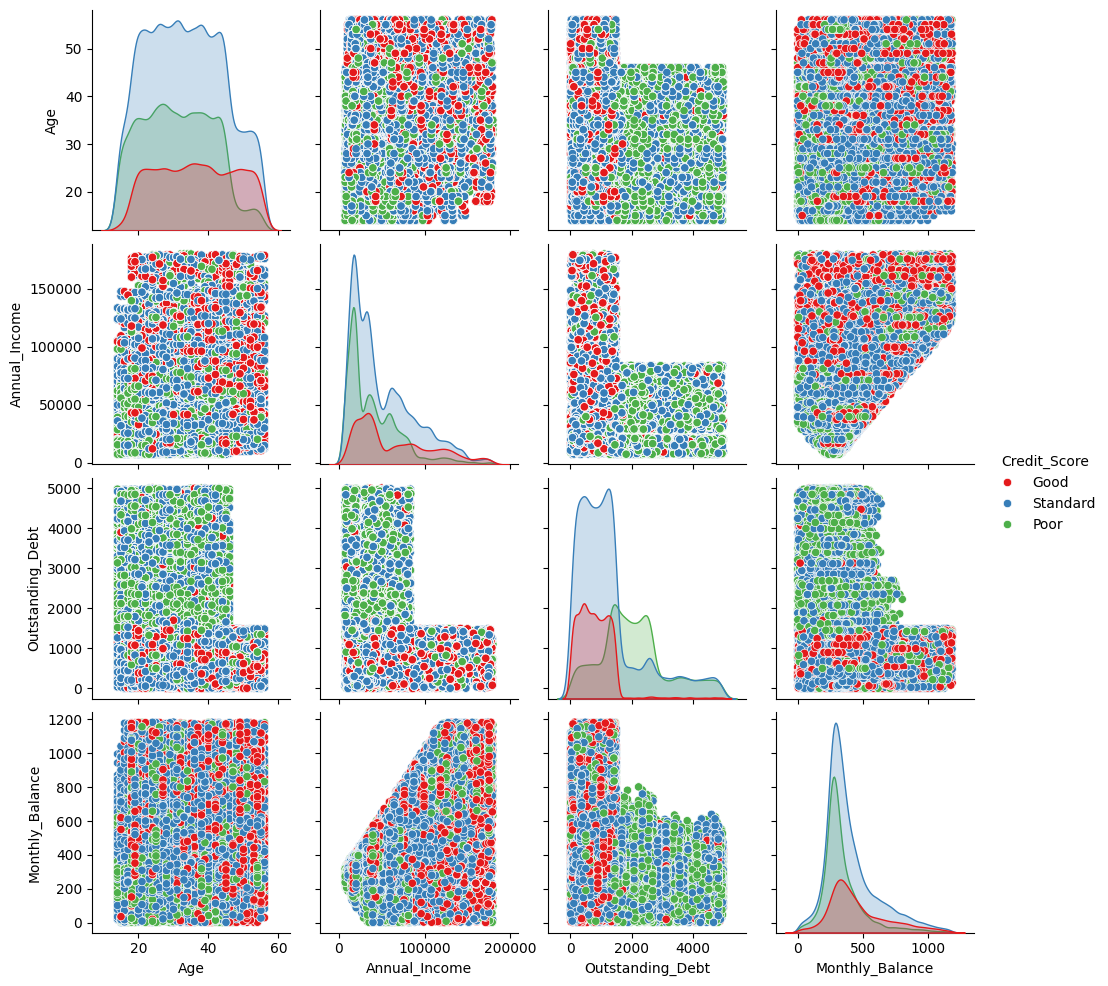

In [33]:
sns.pairplot(df[["Age", "Annual_Income", "Outstanding_Debt", "Monthly_Balance", "Credit_Score"]], hue="Credit_Score", palette="Set1")
plt.show()

### **Insights :**


*  If Good credit scores concentrate around middle ages (25–45), while Poor spreads wider, it suggests age influences financial stability.

*   Poor credit scores are likely associated with higher debt levels.



## Chart - 14

### **Heat Map**

This heatmap shows the pairwise correlation between all numeric features in the dataset in which values range fron -1 to +1.

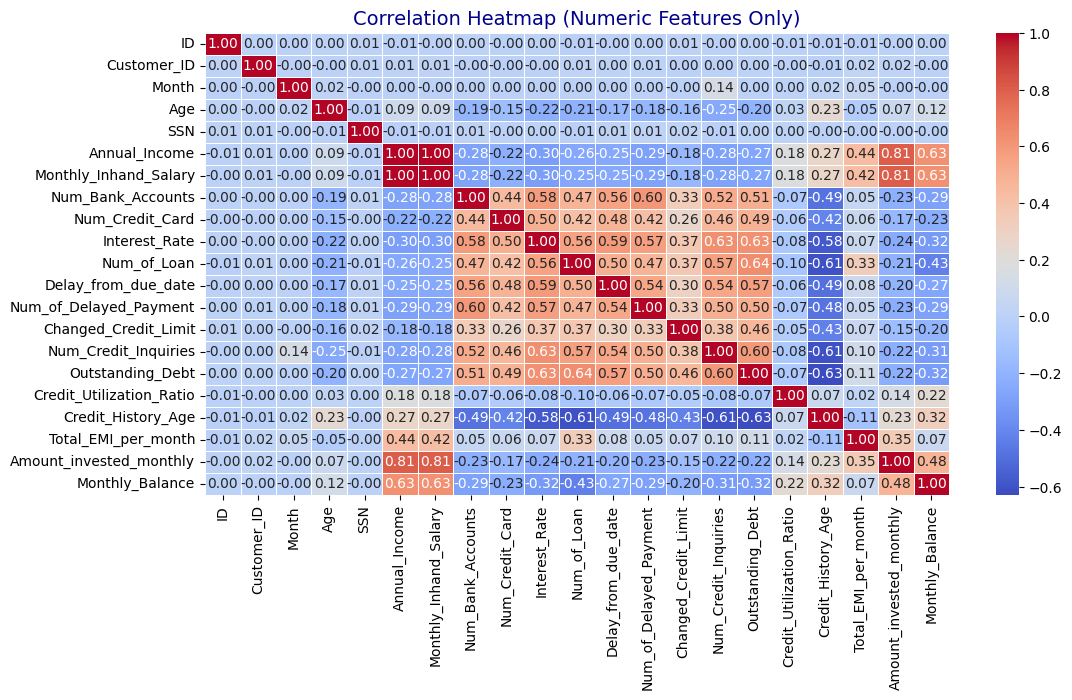

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(
    df.select_dtypes(include=[np.number]).corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",   # show correlation values with 2 decimals
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=14, color="darkblue")
plt.show()

### **Insights :**



*   Annual_Income and Monthly_Balance show a strong positive correlation, it suggests that people with higher income maintain higher balances.

*   Outstanding_Debt is negatively correlated with Credit_Score, it indicates that more debt lowers creditworthiness.



# **Conclusion**

This dataset contains 100,000 customer records with 28 features, primarily focused on financial and credit behavior. It provides a comprehensive view of customers’ demographic details, income levels, banking activity, loan status, credit utilization, repayment history, and investment patterns.

The target column Credit_Score classifies customers into three categories — Good, Standard, and Poor, making the dataset highly suitable for credit risk analysis, classification models, and financial behavior studies.

Use Cases:
   * Building and evaluating credit scoring models.

*   Exploratory Data Analysis (EDA) on customer financial habits.

*   Identifying risk factors leading to poor credit performance.

*   Insights for banking, lending, and investment decisions.


Overall, this dataset offers a rich foundation for data science projects in finance, including predictive modeling, customer segmentation, and credit risk management.